<a href="https://www.kaggle.com/code/wabass/heart-failure-prediction?scriptVersionId=177841902" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction-clinical-records/heart_failure_clinical_records.csv


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

data = pd.read_csv("/kaggle/input/heart-failure-prediction-clinical-records/heart_failure_clinical_records.csv")

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [4]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [5]:
# Checking for Missing Values

missing_values = data.isnull().sum
print('Missing value count for each column:')
print(missing_values)

Missing value count for each column:
<bound method DataFrame.sum of         age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0     False    False                     False     False              False   
1     False    False                     False     False              False   
2     False    False                     False     False              False   
3     False    False                     False     False              False   
4     False    False                     False     False              False   
...     ...      ...                       ...       ...                ...   
4995  False    False                     False     False              False   
4996  False    False                     False     False              False   
4997  False    False                     False     False              False   
4998  False    False                     False     False              False   
4999  False    False                     False     False       

 **<font color='red'> Number of People with Blood Pressure vs Age Distribution. </font>**

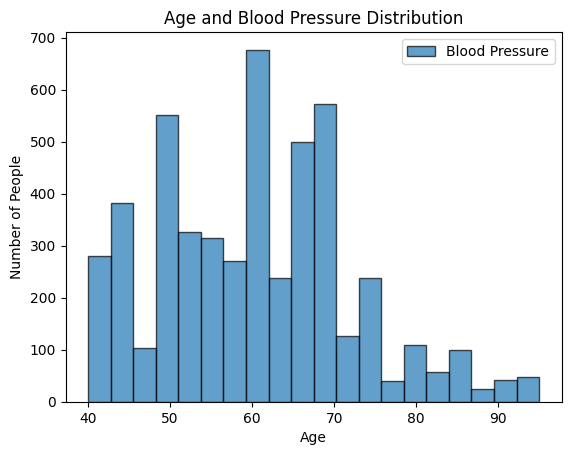

In [6]:
age_column = "age"
blood_pressure_column = "high_blood_pressure"

#create a histogram of age distribution

plt.hist(data[age_column],bins=20,edgecolor="black", alpha=0.7, label= 'Blood Pressure')

#set labels and title

plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Age and Blood Pressure Distribution')

# Add legend
plt.legend()

# show Plot
plt.show()

**<font color='red'>Relationship between Blood pressure and other Variable(Diabetes, Sex, Smoking, Anaemia).</font>**

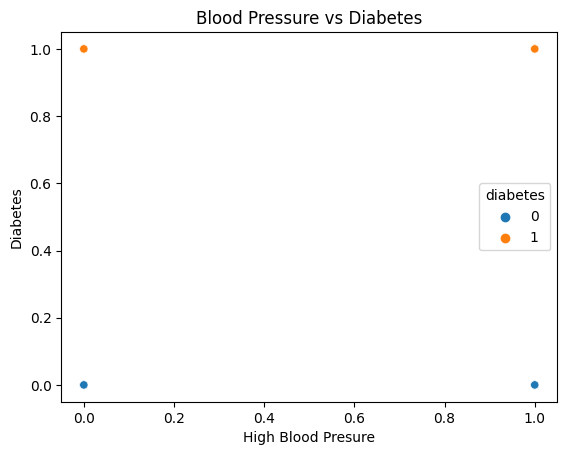

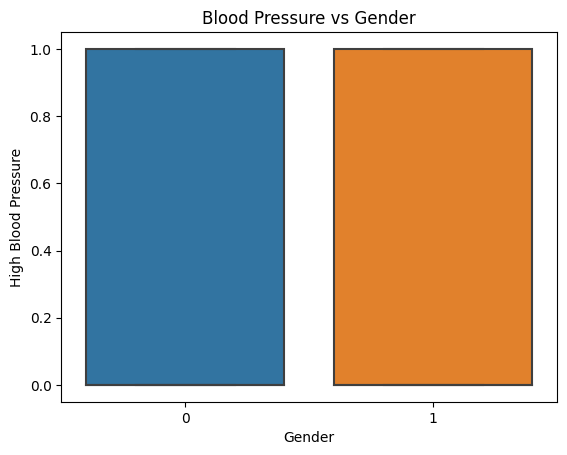

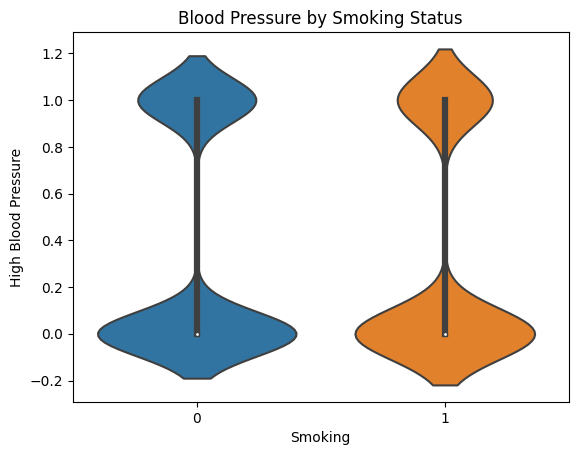

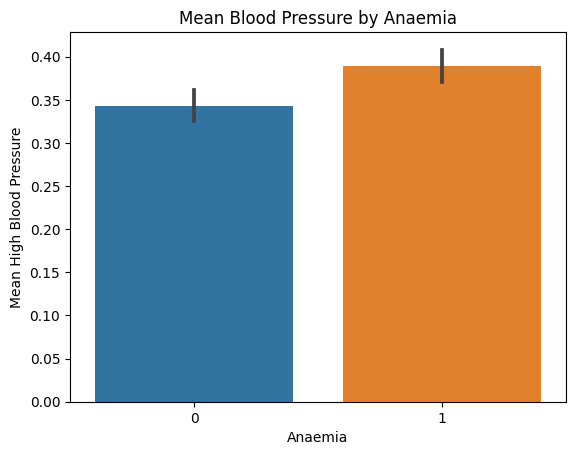

In [7]:
# Scatter Plot of blood pressure vs diabetes
sns.scatterplot(data=data, x='high_blood_pressure',y='diabetes',hue='diabetes')
plt.xlabel('High Blood Presure')
plt.ylabel('Diabetes')
plt.title('Blood Pressure vs Diabetes')
plt.show()


# Box plot of Blood pressure grouped by Gender
sns.boxplot(data=data, x='sex', y='high_blood_pressure')
plt.xlabel('Gender')
plt.ylabel('High Blood Pressure')
plt.title('Blood Pressure vs Gender')
plt.show()

# Violin plot of Blood pressure grouped by smoking status
sns.violinplot(data=data, x='smoking' , y='high_blood_pressure')
plt.xlabel('Smoking')
plt.ylabel('High Blood Pressure')
plt.title('Blood Pressure by Smoking Status')
plt.show()

# Bar plot of Mean blood pressure grouped by Anemia
sns.barplot(data=data, x='anaemia', y='high_blood_pressure')
plt.xlabel('Anaemia')
plt.ylabel('Mean High Blood Pressure')
plt.title('Mean Blood Pressure by Anaemia')
plt.show()



**<font color='red'> Relationship Matrix.</font>**

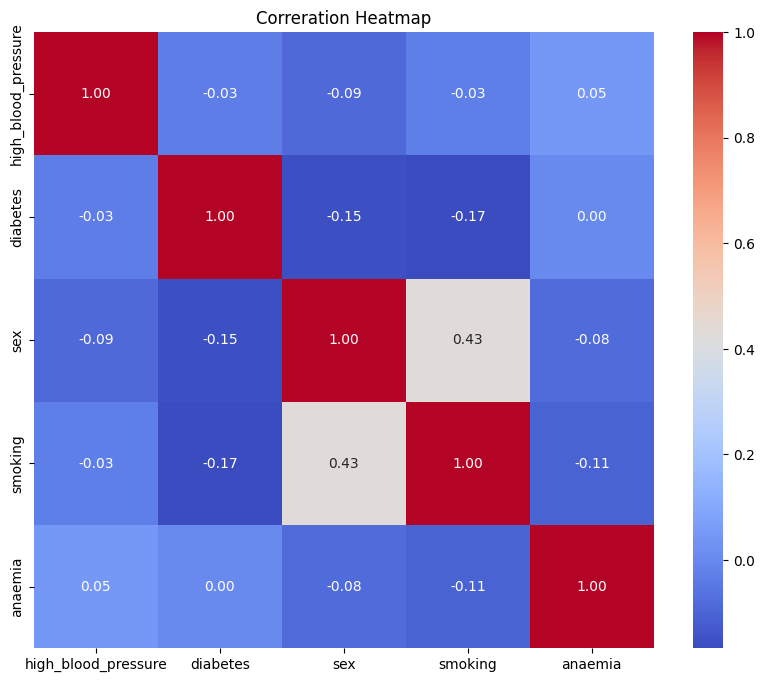

In [8]:
# Computing the correlation matrix 

corr_matrix = data[['high_blood_pressure', 'diabetes', 'sex', 'smoking', 'anaemia']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correration Heatmap')
plt.show()

**<font color='red'> Blood pressure vs Creatinine_Phosphokinase relation.</font>**

"Creatinine Phosphokinase" (CPK), which is an enzyme found predominantly in the heart, brain, and skeletal muscle. CPK levels can be measured through a blood test and are often used as a marker of muscle damage or injury, especially related to heart attacks, muscular dystrophy, or other muscle disorders.

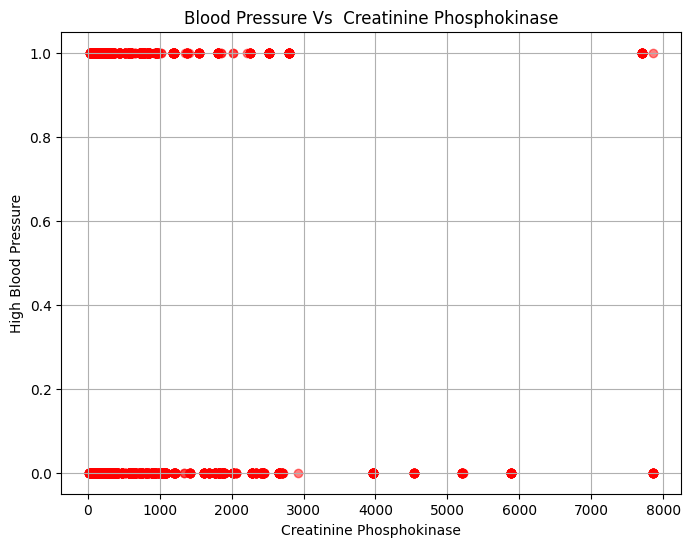

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(data['creatinine_phosphokinase'], data['high_blood_pressure'], alpha=0.5, color='red')
plt.xlabel('Creatinine Phosphokinase')
plt.ylabel('High Blood Pressure')
plt.title('Blood Pressure Vs  Creatinine Phosphokinase')
plt.grid(True)
plt.show()

**<font color='red'> Number of Deaths per Age Distribution.</font>**

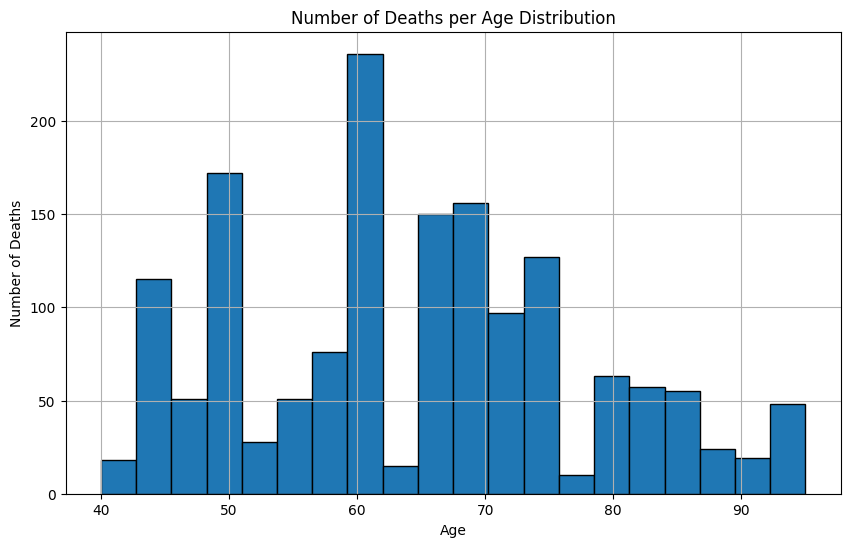

In [10]:
# Filter data for the deceased individuals
deceased_data = data[data['DEATH_EVENT'] == 1]

# Create a histogram of age distribution for deceased individuals
plt.figure(figsize=(10, 6))  # Specify width and height of the figure
plt.hist(deceased_data['age'], bins=20, edgecolor='black')  # Use 'deceased_data['age']' to access the 'age' column
plt.xlabel('Age')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths per Age Distribution')
plt.grid(True)
plt.show()
